In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**How does an individuals Career Goal influence how they rate themselves vs how they rate their partners attritubes? **

In [2]:
#Import CSV and create a DataFrame 
file = "Output/CleanedSpeed.csv"
main_df = pd.read_csv(file, encoding="ISO-8859-1")
main_df

,Unique ID,Gender,Wave,Match,Same Race,Age of Partner,Race of Partner,Dates Per Week,Outings Per Week,Partner Preference Attractive,...,Own Rating Ambition,Decision,Estimation of Matches,Number of Dates,Your Preference Attractive Post-Date,Your Preference Sincere Post-Date,Your Preference Intelligence Post-Date,Your Preference Fun Post-Date,Your Preference Ambition Post-Date,Your Preference Shared Interests Post-Date
0,1,Female,1,No,No,27.0,White,7.0,1.0,35.0,...,7.0,Yes,4.0,NaN,15.0,20.0,20.0,15.0,15.0,15.0
1,1,Female,1,No,No,22.0,White,7.0,1.0,60.0,...,7.0,Yes,4.0,NaN,15.0,20.0,20.0,15.0,15.0,15.0
2,1,Female,1,Yes,Yes,22.0,Asian,7.0,1.0,19.0,...,7.0,Yes,4.0,NaN,15.0,20.0,20.0,15.0,15.0,15.0
3,1,Female,1,Yes,No,23.0,White,7.0,1.0,30.0,...,7.0,Yes,4.0,NaN,15.0,20.0,20.0,15.0,15.0,15.0
4,1,Female,1,Yes,No,24.0,Latino,7.0,1.0,30.0,...,7.0,Yes,4.0,NaN,15.0,20.0,20.0,15.0,15.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6811,552,Male,21,No,No,26.0,Latino,2.0,1.0,10.0,...,7.0,No,3.0,1.0,70.0,0.0,20.0,10.0,0.0,0.0
6812,552,Male,21,No,No,24.0,Other,2.0,1.0,50.0,...,7.0,No,3.0,1.0,70.0,0.0,20.0,10.0,0.0,0.0
6813,552,Male,21,No,No,29.0,Latino,2.0,1.0,40.0,...,7.0,No,3.0,1.0,70.0,0.0,20.0,10.0,0.0,0.0
6814,552,Male,21,No,No,22.0,Asian,2.0,1.0,10.0,...,7.0,No,3.0,1.0,70.0,0.0,20.0,10.0,0.0,0.0


First, we need to check how many unique careers are in the data. Then we need to determine which careers we should drop. Including carrers with very few entries would skew the data. Somebody can make the wrong assumption about certain career types with one or two individuals responses compared to a career type with many people. 

In [4]:
#The data we are using has multiple rows per individual and those rows include unique values and duplicate values.  Intended Career is duplicate value. 
#To get a proper count I first dropped all duplicates based on Unique ID, keeping only the first entery (keeping the last would work all the same). 

#drop duplicates and assign it to a dictionary 
career_count = main_df.drop_duplicates(subset="Unique ID",keep="first")
#use value_counts to sum up the Intended Careers and build it a dataframe from it. 
career_count_df = pd.DataFrame(career_count['Intended Career'].value_counts())
career_count_df

,Intended Career
Academic/Research,116
Business/Finance,106
Lawyer,44
Creative Arts,41
International Affairs,26
Undecided,23
Doctor,22
Psychologist,16
Engineer,14
Social Work,14


In [9]:
#This is the sum of how many participates. 
career_count_df.sum()

Intended Career    438
dtype: int64

In [11]:
#Now we want to remove any Intended Career with too few participates. I removed Career tpes based on the middle quantile, 50th percentile. 
#use the quantile function to calculate which number falls within the 50th percentile (14). 
q = career_count_df["Intended Career"].quantile(.5)
#keep only the carrers that are above the 50th percentile. 
career_count_df[career_count_df["Intended Career"] > q]

,Intended Career
Academic/Research,116
Business/Finance,106
Lawyer,44
Creative Arts,41
International Affairs,26
Undecided,23
Doctor,22
Psychologist,16


In [15]:
#Create a new database from the main_df and include only careers listed in the career_count_df. 
#We use the main dataframe because it still includes all the individual datapoints we need to calculate the mean values of attribute ratings later on. 

#I manually created this new dictionary using the str.contains function to look down the Intended Career columns and find the names that are True. 
top_career_count = main_df[main_df["Intended Career"].str.contains("Academic/Research|Business/Finance|Lawyer|Creative Arts|International Affairs|Undecided|Doctor|Psychologist") == True]

#checking to confirm that the list below matches the list above but all the datapoints expected.                                            
top_career_count['Intended Career'].value_counts()                              

Academic/Research        1760
Business/Finance         1592
Creative Arts             648
Lawyer                    629
International Affairs     395
Doctor                    369
Undecided                 347
Psychologist              241
Name: Intended Career, dtype: int64

In [16]:
#Now we want to simplify the dataframe by using the listing the interested columns and using the copy function. 
#(this is optional but it helps with writing code later on see all the column names in one place) 
career_own_df = top_career_count[["Intended Career","Own Rating Attractive","Own Rating Intelligence","Own Rating Fun","Own Rating Ambition", "Own Rating Sincere"]].copy()
career_rated_df = top_career_count[["Intended Career","Partner Rating Attractive","Partner Rating Intelligence","Partner Rating Fun","Partner Rating Ambition", "Partner Rating Sincere"]].copy()

In [17]:
career_own_df

,Intended Career,Own Rating Attractive,Own Rating Intelligence,Own Rating Fun,Own Rating Ambition,Own Rating Sincere
30,Lawyer,7.0,7.0,9.0,8.0,8.0
31,Lawyer,7.0,7.0,9.0,8.0,8.0
32,Lawyer,7.0,7.0,9.0,8.0,8.0
33,Lawyer,7.0,7.0,9.0,8.0,8.0
34,Lawyer,7.0,7.0,9.0,8.0,8.0
...,...,...,...,...,...,...
6789,Business/Finance,7.0,8.0,3.0,5.0,8.0
6790,Business/Finance,7.0,8.0,3.0,5.0,8.0
6791,Business/Finance,7.0,8.0,3.0,5.0,8.0
6792,Business/Finance,7.0,8.0,3.0,5.0,8.0


In [18]:
career_rated_df

,Intended Career,Partner Rating Attractive,Partner Rating Intelligence,Partner Rating Fun,Partner Rating Ambition,Partner Rating Sincere
30,Lawyer,6.0,8.0,7.0,7.0,7.0
31,Lawyer,6.0,10.0,6.0,6.0,5.0
32,Lawyer,10.0,10.0,10.0,10.0,10.0
33,Lawyer,7.0,7.0,9.0,9.0,7.0
34,Lawyer,8.0,9.0,8.0,8.0,8.0
...,...,...,...,...,...,...
6789,Business/Finance,10.0,8.0,6.0,9.0,5.0
6790,Business/Finance,7.0,8.0,8.0,8.0,7.0
6791,Business/Finance,6.0,7.0,6.0,6.0,7.0
6792,Business/Finance,5.0,5.0,4.0,4.0,7.0


In [21]:

#To get the average scores by career type, I use the groupby function to combine all the enteries by Intended Career and then calculate the mean of all those values.

#calculating the mean of how the individual rates themself (quick way to get the single entry in the dataset because all the values in these columns are duplicates)
career_att_own_df= pd.DataFrame(career_own_df.groupby('Intended Career')['Own Rating Attractive'].mean())
career_sin_own_df= pd.DataFrame(career_own_df.groupby('Intended Career')['Own Rating Sincere'].mean())
career_fun_own_df= pd.DataFrame(career_own_df.groupby('Intended Career')['Own Rating Fun'].mean())
career_int_own_df= pd.DataFrame(career_own_df.groupby('Intended Career')['Own Rating Intelligence'].mean())
career_amb_own_df= pd.DataFrame(career_own_df.groupby('Intended Career')['Own Rating Ambition'].mean())
#calculate the mean of how individuals their partner rated them. 
career_att_rated_df= pd.DataFrame(career_rated_df.groupby('Intended Career')['Partner Rating Attractive'].mean())
career_sin_rated_df= pd.DataFrame(career_rated_df.groupby('Intended Career')['Partner Rating Sincere'].mean())
career_fun_rated_df= pd.DataFrame(career_rated_df.groupby('Intended Career')['Partner Rating Fun'].mean())
career_int_rated_df= pd.DataFrame(career_rated_df.groupby('Intended Career')['Partner Rating Intelligence'].mean())
career_amb_rated_df= pd.DataFrame(career_rated_df.groupby('Intended Career')['Partner Rating Ambition'].mean())

In [20]:
#now we want to merge all these dataframes into one consolidated dataframe. One database will help simplify the coding needed to display the charts later on. 
#I merged the own rated and partner rated dataframes 
career_att_merged = pd.merge(career_att_own_df, career_att_rated_df, on=["Intended Career"])
career_sin_merged = pd.merge(career_sin_own_df, career_sin_rated_df, on=["Intended Career"])
career_fun_merged = pd.merge(career_fun_own_df, career_fun_rated_df, on=["Intended Career"])
career_int_merged = pd.merge(career_int_own_df, career_int_rated_df, on=["Intended Career"])
career_amb_merged = pd.merge(career_amb_own_df, career_amb_rated_df, on=["Intended Career"])
#Then I built out the final dataframe by building on merges using the previous merge (as I understand it, only two dataframes can be merged at once)
merge1 = pd.merge(career_att_merged, career_sin_merged, on=["Intended Career"])
merge2 = pd.merge(merge1, career_fun_merged, on=["Intended Career"])
merge3 = pd.merge(merge2 , career_int_merged, on=["Intended Career"])
career_scores_df = pd.merge(merge3, career_amb_merged, on=["Intended Career"])
career_scores_df

,Own Rating Attractive,Partner Rating Attractive,Own Rating Sincere,Partner Rating Sincere,Own Rating Fun,Partner Rating Fun,Own Rating Intelligence,Partner Rating Intelligence,Own Rating Ambition,Partner Rating Ambition
Intended Career,,,,,,,,,,
Academic/Research,7.053977,5.936244,8.414205,7.112754,7.503409,6.072886,8.427841,7.362739,7.228409,6.473958
Business/Finance,7.102922,6.254380,8.102287,7.099282,7.782084,6.403642,8.408513,7.381172,7.824651,7.108108
Creative Arts,6.905864,6.190016,8.157407,7.085622,7.723765,6.569331,8.040123,7.145057,7.496914,6.550775
Doctor,6.856369,6.412356,8.506775,7.291789,7.260163,6.476744,8.373984,7.497076,7.411924,6.965361
International Affairs,7.513924,6.647436,8.377215,7.365285,7.979747,6.819372,8.101266,7.338961,7.941772,6.797260
Lawyer,6.971383,6.203252,7.845787,7.067810,7.709062,6.610744,8.607313,7.491803,7.443561,7.132428
Psychologist,6.965665,6.513063,8.738197,7.325688,8.008584,6.974771,8.532189,7.093182,7.978541,6.629808
Undecided,6.521614,6.034431,8.135447,7.387538,7.688761,6.391768,8.158501,7.512158,7.086455,6.546474


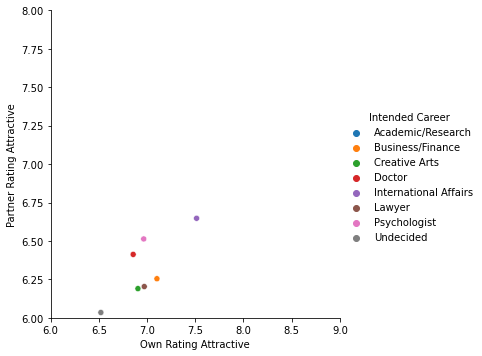

In [22]:
#now using Seaborn I am able to use simple coding to create fast scatterplots and export png files. 
# While scatterplots are best used to show many datapoints, I find it also be to a great visual tool to display two variables across many catagories. 

att_plot = sns.relplot(
    data=career_scores_df,
    x="Own Rating Attractive", y="Partner Rating Attractive", hue="Intended Career"
)

att_plot.set(xlim=(6, 9), ylim=(6, 8))


plt.savefig('Images/career_Attractive.png', dpi=300)

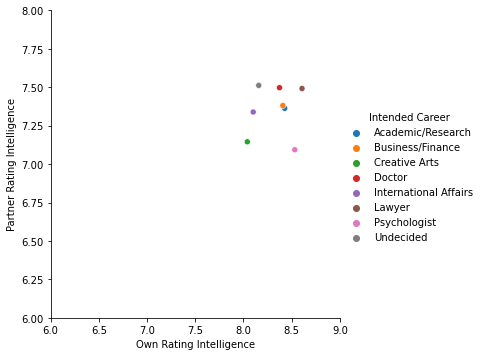

In [24]:
int_plot = sns.relplot(
    data=career_scores_df,
    x="Own Rating Intelligence", y="Partner Rating Intelligence", hue="Intended Career",
)


int_plot.set(xlim=(6, 9), ylim=(6, 8))
plt.savefig('Images/career_Intelligence.png', dpi=300)

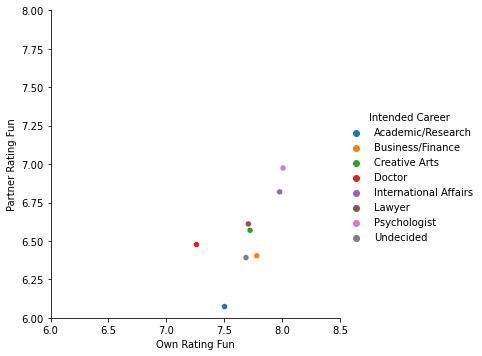

In [17]:
fun_plot = sns.relplot(
    data=career_scores_df,
    x="Own Rating Fun", y="Partner Rating Fun", hue="Intended Career",
)

fun_plot.set(xlim=(6, 9), ylim=(6, 8))
plt.savefig('Images/career_Fun.png', dpi=300)

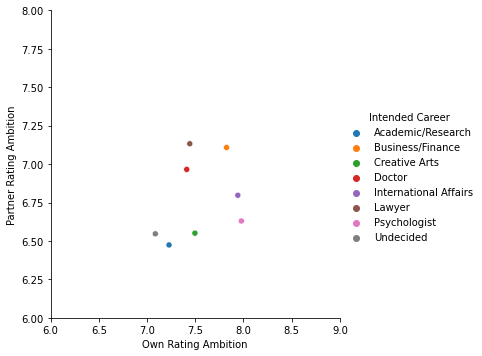

In [20]:
amb_plot = sns.relplot(
    data=career_scores_df,
    x="Own Rating Ambition", y="Partner Rating Ambition", hue="Intended Career",
)

amb_plot.set(xlim=(6, 9), ylim=(6, 8))
plt.savefig('Images/career_Ambition.png', dpi=300)

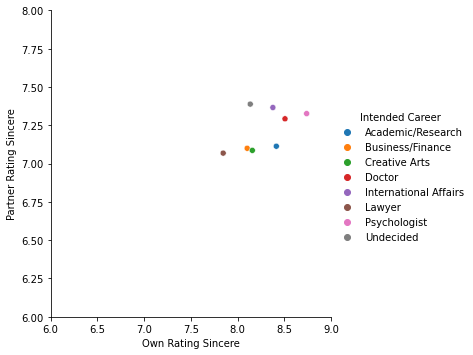

In [25]:
sin_plot = sns.relplot(
    data=career_scores_df,
    x="Own Rating Sincere", y="Partner Rating Sincere", hue="Intended Career",
)

sin_plot.set(xlim=(6, 9), ylim=(6, 8))
plt.savefig('Images/career_Sincere.png', dpi=300)